#Reto parte 1
#Limpieza, análisis, visualización y K means.

Para la limpieza, eliminaremos las variables del dataframe que no serán utilzadas para la construcción del modelo de K-means. Para poder determinar el número de clústers, vamos a crear un dataframe que contenga tres columnas (latitud, longitud y coordenadas).

La columna coordenadas, será una columna nueava en el dataframe que estará conformada por la latitud y la longitud.

La primera parte de la limpieza, nos ayudará a identificar las variables que vamos a utilizar para contruir nuestro modelo de k-means.



##Se decidió usar la base de Aguas Subterraneas

Intsalamos librerías e importamo paquetes.

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [ ]:
#Importamos librerías 
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
#Carga de fuente de datos seleccionada.
subterranea="https://raw.githubusercontent.com/cacevedo29/imagenes/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
df=pd.read_csv(subterranea, sep= ',', encoding='latin-1')

In [ ]:
#Verificamos tamaño inicial del set de datos.
df.shape

(1068, 57)

###Exploracion de los Datos

En esta sección exploraremos los datos tomando en cuenta las siguientes indicaciones:

*Explorar los datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

*Identificando tendencias centrales promedio, media y mediana de los datos.

*Identificar medidas de dispersión, máximo, mínimo.

*Identificar medidas de posición no centrales , los cuartiles , outliers.

*Identificar correlaciones.

In [ ]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [ ]:
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df.isna()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1066,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [ ]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


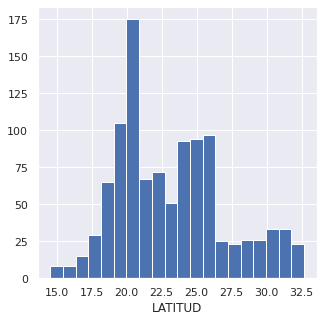

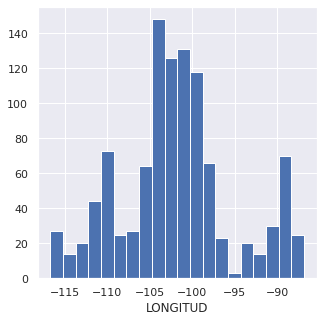

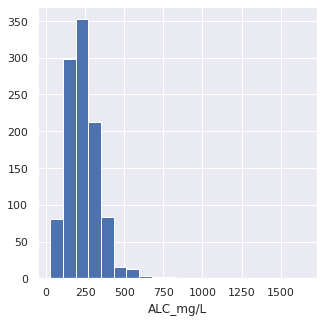

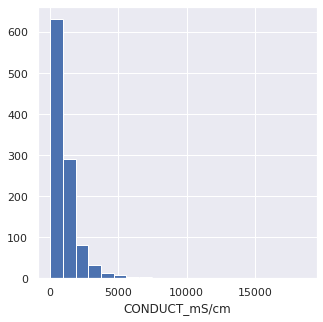

In [ ]:
import seaborn as sns
from scipy import stats
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
numericas = ['LATITUD', 'LONGITUD', 'ALC_mg/L', 'CONDUCT_mS/cm']
for i in numericas:
  sns.set(rc={'figure.figsize':(5,5)})
  plt.hist(df[i], bins=20)                  
  plt.xlabel(i)
  plt.show()


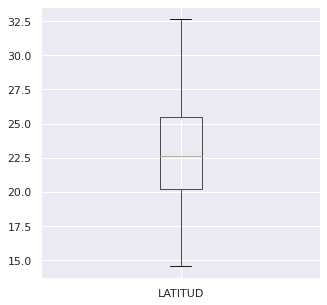

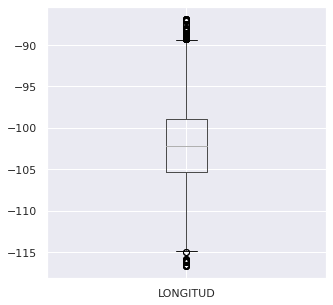

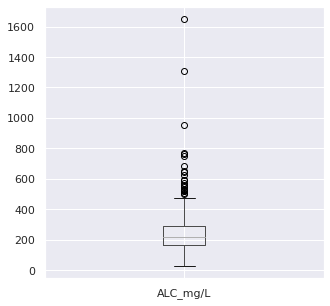

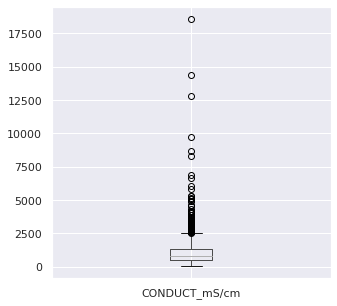

In [ ]:
#boxplot = df.boxplot(column=['LATITUD', 'LONGITUD', 'ALC_mg/L', 'CONDUCT_mS/cm','SDT_mg/L']) 
for i in numericas:
  boxplot = df.boxplot(column=[i]) 
  plt.show()

In [ ]:
df.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
LONGITUD,1.000000,-0.760204,NaN,0.167234,0.061118,NaN
LATITUD,-0.760204,1.000000,NaN,-0.080026,0.053786,NaN
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.167234,-0.080026,NaN,1.000000,0.232003,NaN
CONDUCT_mS/cm,0.061118,0.053786,NaN,0.232003,1.000000,NaN
SDT_mg/L,NaN,NaN,NaN,NaN,NaN,NaN


Extraempos y graficamos los datos de Latitud y Longitud

#Preparación de los Datos para K-mens.

In [ ]:
latlong=df[["LATITUD","LONGITUD"]]

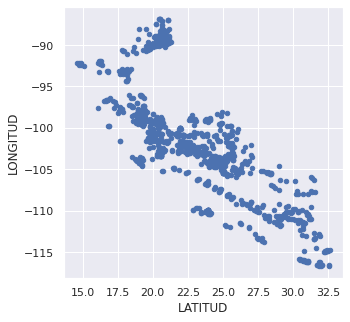

In [ ]:
latlong.plot.scatter( "LATITUD","LONGITUD")

Se agrega una columna de coordenadas para facilitar el análisis.

In [ ]:
df["COORDENADAS"] = list(zip(df.LONGITUD, df.LATITUD))
df["COORDENADAS"] = df["COORDENADAS"].apply(Point)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,COORDENADAS
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


Se crea objeto para graficar.

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="COORDENADAS")


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,COORDENADAS
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


Importamos mapas

In [ ]:
#mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Graficamos el mapa de México.

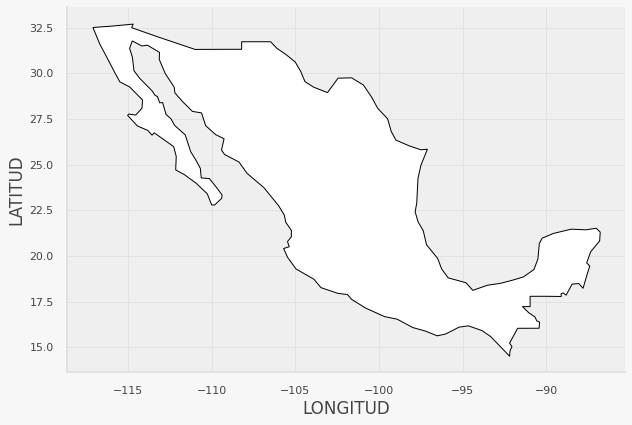

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

Visualizamos la ubicación de las aguas subterraneas sobre la superficie de México con los valores de la Latitud y Longitud.

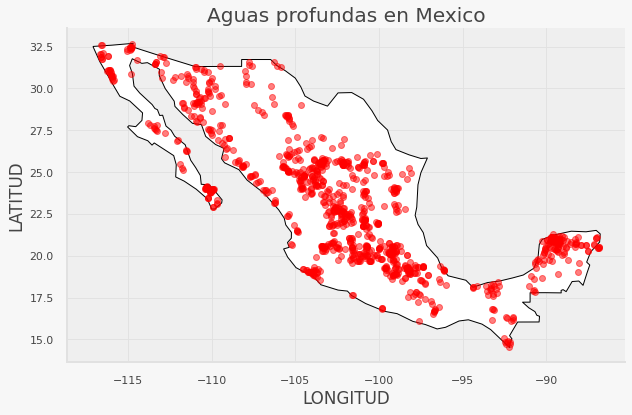

In [ ]:

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas profundas en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Agrupamos la información por es

#Análisis de K-means

In [ ]:
escalador = MinMaxScaler().fit(latlong.values)

In [ ]:
agua = pd.DataFrame(escalador.transform(latlong.values),
                       columns=["latitude", "longitude"])


Determinamos el numero de clusters

In [ ]:
kmeans1 = KMeans(n_clusters=4).fit(agua.values)
kmeans1

KMeans(n_clusters=4)

Método del codo para visualizar el númer de clústers.

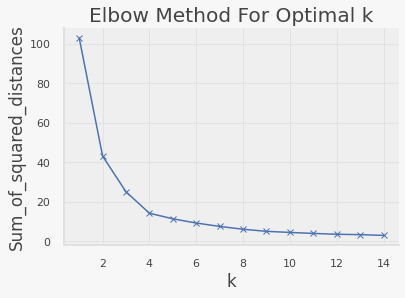

In [ ]:
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(agua.values)
    Sum_of_squared_distances.append(km.inertia_)
###plotting Elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
agua["cluster"] = kmeans1.labels_

In [ ]:
kmeans1

KMeans(n_clusters=4)

In [ ]:
agua.cluster.unique()

array([0, 3, 1, 2], dtype=int32)

Graficamos los clusters.

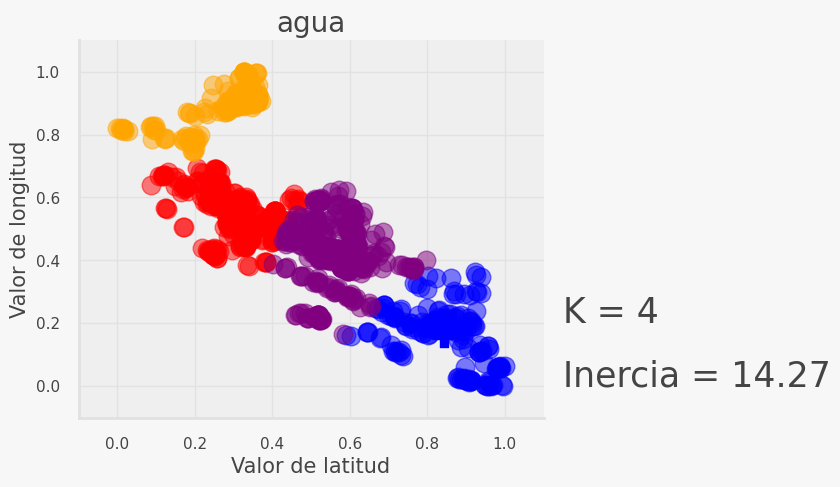

In [ ]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "purple"]

for cluster in range(kmeans1.n_clusters):
    plt.scatter(agua[agua["cluster"] == cluster]["latitude"],
                agua[agua["cluster"] == cluster]["longitude"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans1.cluster_centers_[cluster][0], 
                kmeans1.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("agua", fontsize=20)
plt.xlabel("Valor de latitud", fontsize=15)
plt.ylabel("Valor de longitud", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans1.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans1.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

#del agua["cluster"] 

Visualización de la distribución de los clusters.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


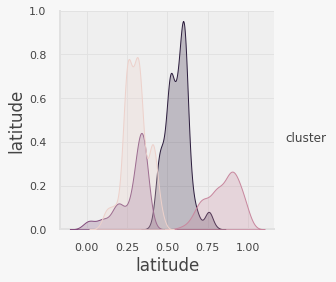

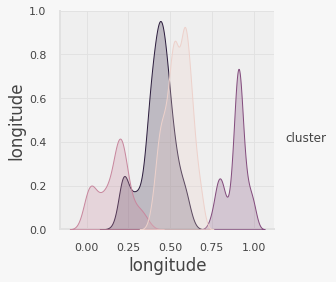

In [ ]:
sns.pairplot(agua.dropna(), hue='cluster',size=4,vars=["latitude"],kind='scatter')
1
sns.pairplot(agua.dropna(), hue='cluster',size=4,vars=["longitude"],kind='scatter')

Greficamos los clusters sobre el mapa de la superficie de México.

In [66]:
cor_agua=agua[["latitude","longitude","cluster"]]

In [67]:
cor_agua
cor_agua["COORDENADAS"] = list(zip(df.LONGITUD, df.LATITUD))
cor_agua["COORDENADAS"] =cor_agua["COORDENADAS"].apply(Point)
cor_agua.head()

,latitude,longitude,cluster,COORDENADAS
0,0.422140,0.491345,0,POINT (-102.0221 22.20887)
1,0.410587,0.485350,0,POINT (-102.20075 21.99958)
2,0.430860,0.482422,0,POINT (-102.28801 22.36685)
3,0.420786,0.482205,0,POINT (-102.29449 22.18435)
4,0.490724,0.215417,3,POINT (-110.2448 23.45138)


In [71]:
godf = gpd.GeoDataFrame(cor_agua, geometry="COORDENADAS")
godf.head()

,latitude,longitude,cluster,COORDENADAS
0,0.422140,0.491345,0,POINT (-102.02210 22.20887)
1,0.410587,0.485350,0,POINT (-102.20075 21.99958)
2,0.430860,0.482422,0,POINT (-102.28801 22.36685)
3,0.420786,0.482205,0,POINT (-102.29449 22.18435)
4,0.490724,0.215417,3,POINT (-110.24480 23.45138)


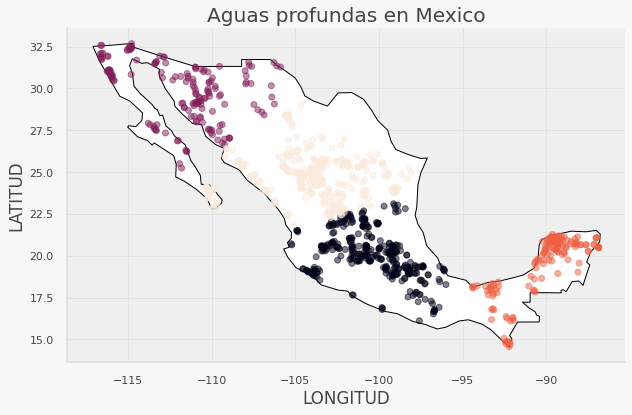

In [72]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
godf.plot(ax=gax, column ='cluster', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterráneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

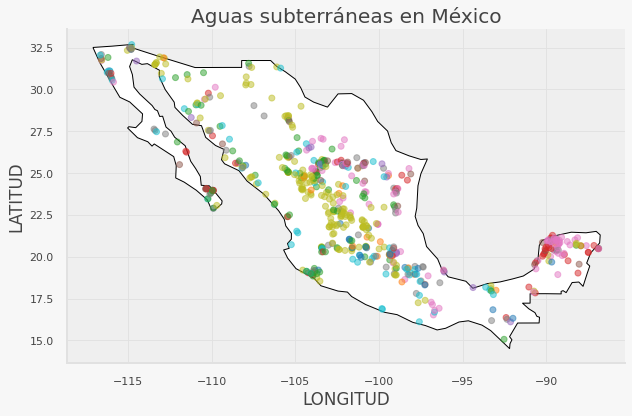

In [76]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, column ='CONTAMINANTES', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterráneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [73]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE', 'COORDENADAS']

In [130]:
ndf=df.copy()

In [131]:
def map(ndf):
  ndf['SEMAFORO']=ndf['SEMAFORO'].map({'Verde': 1, 'Rojo':3, 'Amarillo':2})
  return ndf
b=map(ndf)

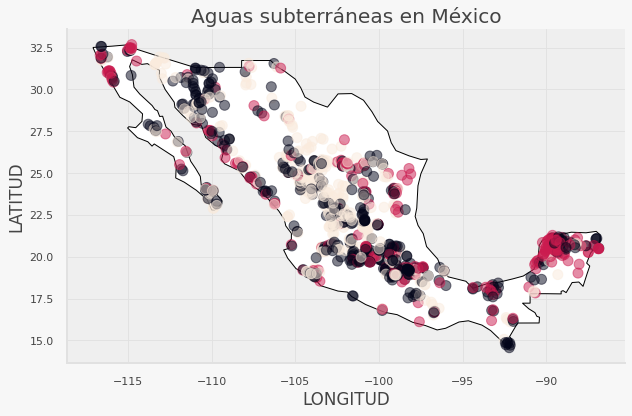

In [135]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gndf.plot(ax=gax, column ='SEMAFORO', alpha = 0.5, c=colores, s=100)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterráneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

#Conclusiones

Al realizar el análisis de K-means, se obtuvieron 4 clústeres que sugieren que no existe relación entre la calidad del agua y su ubicación geográfica.
 
Se analizaron los clústeres para dos grupos con el fin de encontrar alguna relación que nos sugiera que la calidad del agua y su ubicación, están directamente relacionadas.
 
Se realizó el análisis para dos variables Contaminantes y Semáforo y no se encontró relación entre la ubicación y la calidad del agua.

Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.